# Assignment: Trees
Do three questions.

**Q1.** Please answer the following questions in your own words.

1. How are trees constructed?

2. How do trees handle non-linear relationships between variables? Compare this to linear models.

3. Why is the Gini a good loss function for categorical target variables?

4. Why do trees tend to overfit, and how can this tendency be constrained?

5. True or false, and explain: Trees only really perform well in situations with lots of categorical variables as features/covariates.

6. Why don't most versions of classification/regression tree concept allow for more than two branches after a split?

7. What are some heuristic ways you can examine a tree and decide whether it is probably over- or under-fitting?

1) Trees are constructed recursively. With a start point of the entire dataset, one feature divides up the rest of the data based on the path outlined by the designated feature. This proccess continues creating subsets otherwise represented by branches/leaves until an ending point is reached.

2) Trees handle non-linear relationships between variables better than linear models due because they don't automatically assume a linear relationship between variables.

3) The Gini is a good loss function because it measures the composition of a node that allows it to properly indicate the classes from which a node include observations. This value helps the tree make the most optimal split that will create nodes more aligned with the target class.

4) Trees keep splitting until they properly predict outcomes which allow them to include noise as their splits occur continuously. Some ways to constrain this overfitting is to set a limit to the depth of the tree so it doesn't continuously split.

5) False, a tree is very diverse and can also work well with over types of variables such as continous/numerical variables.

6) Using binary classification makes the tree's decision making process significantly simpler as it only needs to decide wheter a node fits a certain criteria or not.

7) As answered earlier the length and depth of a tree are simple ways to understand wheter it is underfitting or overfitting. Signs of a very deep/long tree might indicate overfitting while the opposite might highlight potential underfitting.


**Q2.** This is a case study on regression and classification trees.

1. Load `./data/cars_hw.csv`. How many observations and features/covariates/variables? What are the available variables? Take a look at the first few rows of data.

2. For the categorical variables `Make`, `Color`, `Body_type`, `No_of_Owners`, `Fuel_Type`, `Transmission`, and `Transmission_Type`, create dummy/one-hot-encoded representations. For numeric variables, we'll use `Mileage_Run`, `Make_Year`, and `Seating_Capacity`. Our target variable will be `Price`. Make a train-test split of your data.

3. From `sklearn.tree`, import the `DecisionTreeRegressor` and `plot_tree`. Use a train-test split to iterate over possible values for `min_samples_leaf`, computing the $R^2$ for each value between 1 and 25. What choice achieves the highest $R^2$ on the test data?

4. For the optimal `min_samples_leaf` from 3, regress price on the rest of the features/covariates using the training data. What is your $R^2$ and RMSE on the test set? Plot the dendrogram. Plot the residuals. Is the density of residuals symmetric and centered around 0?

4. Run a linear regression of price on the same variables. Which model -- regression tree or linear regression -- performs better on the test set? Why?

5. Predict prices using both your tree and your linear model, and make a scatter plot of their values. Describe what you see.


Optimal min_samples_leaf: 3 with test R^2 = 0.8389283484336562


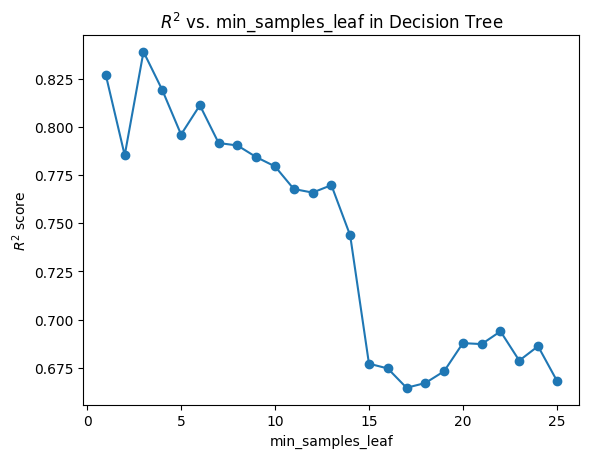

R^2 = 0.8389283484336562
RMSE = 142414.74434717288


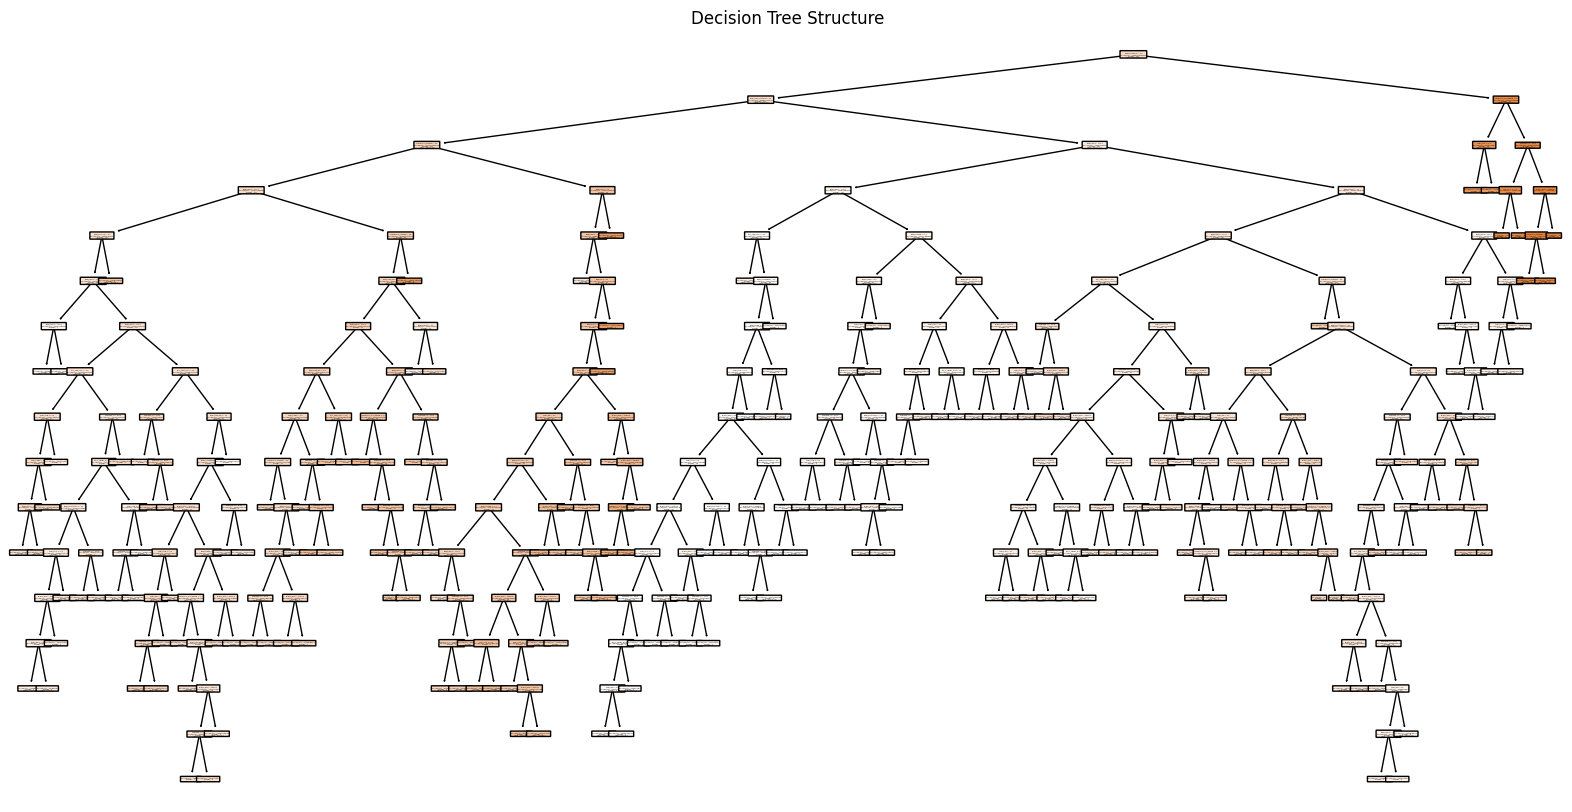

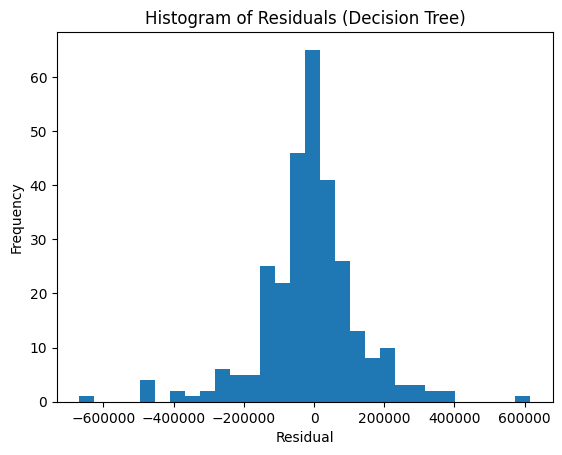

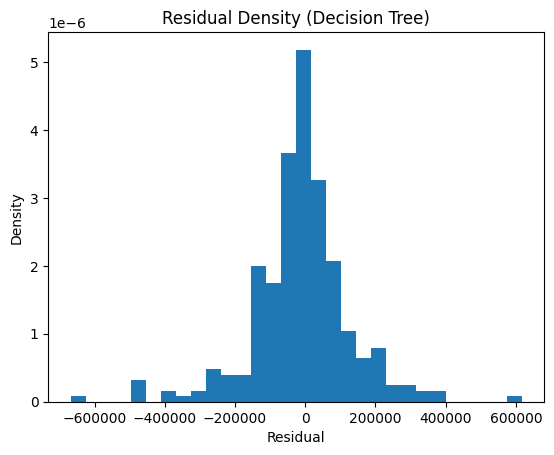


Linear Regression performance on test data:
R^2 = 0.8248032370041243
RMSE = 148528.03571808376


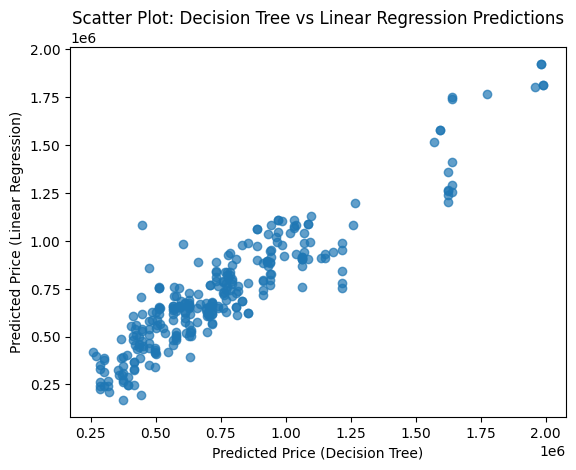

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression

data = pd.read_csv('/content/cars_hw.csv')


# 2) create dummies
categorical_vars = ['Make', 'Color', 'Body_Type', 'No_of_Owners',
                    'Fuel_Type', 'Transmission', 'Transmission_Type']

numeric_vars = ['Mileage_Run', 'Make_Year', 'Seating_Capacity']
target = 'Price'
data_encoded = pd.get_dummies(data, columns=categorical_vars, drop_first=True)


# 3) train-test split
X = data_encoded.drop(columns=[target])
y = data_encoded[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# 4) decision tree
leaf_range = range(1, 26)
r2_scores = {}

# iterate over possible min_samples_leaf
for leaf in leaf_range:
    dt = DecisionTreeRegressor(min_samples_leaf=leaf, random_state=42)
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    r2_scores[leaf] = r2

best_leaf = max(r2_scores, key=r2_scores.get)
print("\nOptimal min_samples_leaf:", best_leaf, "with test R^2 =", r2_scores[best_leaf])

# plot R^2/min_samples_leaf
plt.figure()
plt.plot(list(r2_scores.keys()), list(r2_scores.values()), marker='o')
plt.xlabel("min_samples_leaf")
plt.ylabel("$R^2$ score")
plt.title("$R^2$ vs. min_samples_leaf in Decision Tree")
plt.show()

# 5) fit decision tree
optimal_dt = DecisionTreeRegressor(min_samples_leaf=best_leaf, random_state=42)
optimal_dt.fit(X_train, y_train)
y_pred_optimal = optimal_dt.predict(X_test)
r2_optimal = r2_score(y_test, y_pred_optimal)
rmse_optimal = np.sqrt(mean_squared_error(y_test, y_pred_optimal))

print("R^2 =", r2_optimal)
print("RMSE =", rmse_optimal)

# Plot the decision tree structure.
plt.figure(figsize=(20, 10))
plot_tree(optimal_dt, feature_names=X_train.columns, filled=True, rounded=True)
plt.title("Decision Tree Structure")
plt.show()


# 6) residuals
residuals = y_test - y_pred_optimal

# plot histogram of residuals
plt.figure()
plt.hist(residuals, bins=30)
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals (Decision Tree)")
plt.show()

plt.figure()
plt.hist(residuals, bins=30, density=True)
plt.xlabel("Residual")
plt.ylabel("Density")
plt.title("Residual Density (Decision Tree)")
plt.show()


# 7) linear regression

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# performance metrics
r2_lr = r2_score(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

print("\nLinear Regression performance on test data:")
print("R^2 =", r2_lr)
print("RMSE =", rmse_lr)


# 8) scatter plot of predictions
plt.figure()
plt.scatter(y_pred_optimal, y_pred_lr, alpha=0.7)
plt.xlabel("Predicted Price (Decision Tree)")
plt.ylabel("Predicted Price (Linear Regression)")
plt.title("Scatter Plot: Decision Tree vs Linear Regression Predictions")
plt.show()


**Q3.** This is a case study about classification and regression trees.

1. Load the `Breast Cancer METABRIC.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.

2.  We'll use a consistent set of feature/explanatory variables. For numeric variables, we'll include `Tumor Size`, `Lymph nodes examined positive`, `Age at Diagnosis`. For categorical variables, we'll include `Tumor Stage`, `Chemotherapy`, and `Cancer Type Detailed`. One-hot-encode the categorical variables and concatenate them with the numeric variables into a feature/covariate matrix, $X$.

3. Let's predict `Overall Survival Status` given the features/covariates $X$. There are 528 missing values, unfortunately: Either drop those rows from your data or add them as a category to predict. Constrain the minimum samples per leaf to 10. Print a dendrogram of the tree. Print a confusion matrix of the algorithm's performance. What is the accuracy?

4. For your model in part three, compute three statistics:
    - The **true positive rate** or **sensitivity**:
        $$
        TPR = \dfrac{TP}{TP+FN}
        $$
    - The **true negative rate** or **specificity**:
        $$
        TNR = \dfrac{TN}{TN+FP}
        $$
    Does your model tend to perform better with respect to one of these metrics?

5. Let's predict `Overall Survival (Months)` given the features/covariates $X$. Use the train/test split to pick the optimal `min_samples_leaf` value that gives the highest $R^2$ on the test set (it's about 110). What is the $R^2$? Plot the test values against the predicted values. How do you feel about this model for clinical purposes?

**Q4.** This is a case study about trees using bond rating data. This is a dataset about bond ratings for different companies, alongside a bunch of business statistics and other data. Companies often have multiple reviews at different dates. We want to predict the bond rating (AAA, AA, A, BBB, BB, B, ..., C, D). Do business fundamentals predict the company's rating?

1. Load the `./data/corporate_ratings.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.

2.  Plot a histogram of the `ratings` variable. It turns out that the gradations of AAA/AA/A and BBB/BB/B and so on make it hard to get good results with trees. Collapse all AAA/AA/A ratings into just A, and similarly for B and C.

3. Use all of the variables **except** Rating, Date, Name, Symbol, and Rating Agency Name. To include Sector, make a dummy/one-hot-encoded representation and include it in your features/covariates. Collect the relevant variables into a data matrix $X$.

4. Do a train/test split of the data and use a decision tree classifier to predict the bond rating. Including a min_samples_leaf constraint can raise the accuracy and speed up computation time. Print a confusion matrix and the accuracy of your model. How well do you predict the different bond ratings?

5. If you include the rating agency as a feature/covariate/predictor variable, do the results change? How do you interpret this?


First few rows of data:
  Rating                   Name Symbol                  Rating Agency Name  \
0      A  Whirlpool Corporation    WHR          Egan-Jones Ratings Company   
1    BBB  Whirlpool Corporation    WHR          Egan-Jones Ratings Company   
2    BBB  Whirlpool Corporation    WHR                       Fitch Ratings   
3    BBB  Whirlpool Corporation    WHR                       Fitch Ratings   
4    BBB  Whirlpool Corporation    WHR  Standard & Poor's Ratings Services   

         Date             Sector  currentRatio  quickRatio  cashRatio  \
0  11/27/2015  Consumer Durables      0.945894    0.426395   0.099690   
1   2/13/2014  Consumer Durables      1.033559    0.498234   0.203120   
2    3/6/2015  Consumer Durables      0.963703    0.451505   0.122099   
3   6/15/2012  Consumer Durables      1.019851    0.510402   0.176116   
4  10/24/2016  Consumer Durables      0.957844    0.495432   0.141608   

   daysOfSalesOutstanding  ...  effectiveTaxRate  \
0              

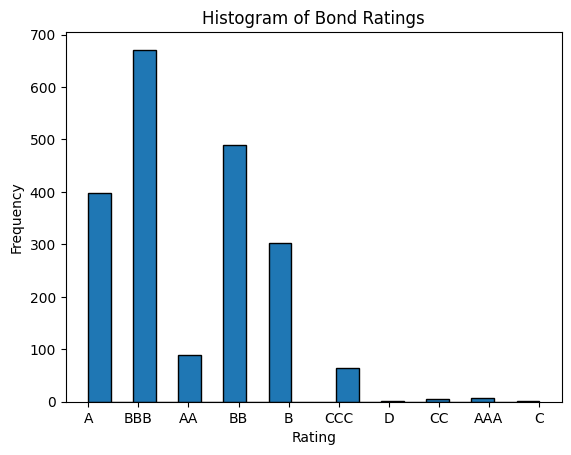

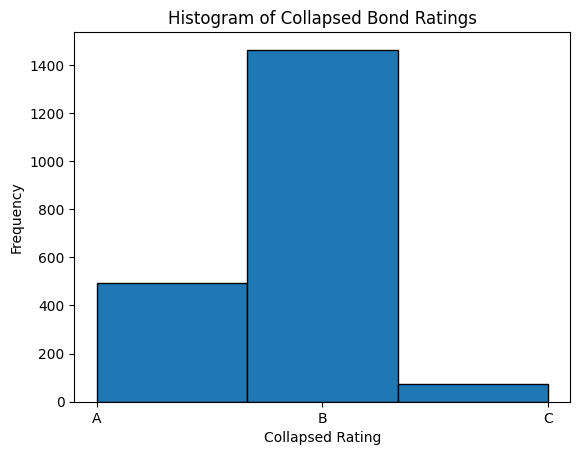


Feature matrix:
   currentRatio  quickRatio  cashRatio  daysOfSalesOutstanding  \
0      0.945894    0.426395   0.099690               44.203245   
1      1.033559    0.498234   0.203120               38.991156   
2      0.963703    0.451505   0.122099               50.841385   
3      1.019851    0.510402   0.176116               41.161738   
4      0.957844    0.495432   0.141608               47.761126   

   netProfitMargin  pretaxProfitMargin  grossProfitMargin  \
0         0.037480            0.049351           0.176631   
1         0.044062            0.048857           0.175715   
2         0.032709            0.044334           0.170843   
3         0.020894           -0.012858           0.138059   
4         0.042861            0.053770           0.177720   

   operatingProfitMargin  returnOnAssets  returnOnCapitalEmployed  ...  \
0               0.061510        0.041189                 0.091514  ...   
1               0.066546        0.053204                 0.104800  ... 

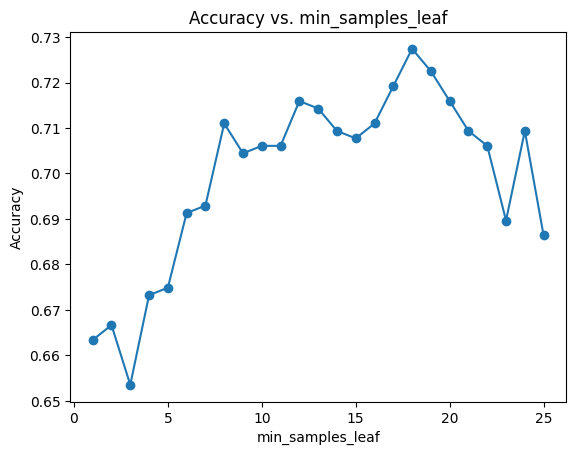


Confusion Matrix (no rating agency):
[[ 67  75   0]
 [ 62 372   6]
 [  0  23   4]]

Overall Accuracy (no rating agency): 0.7274220032840722


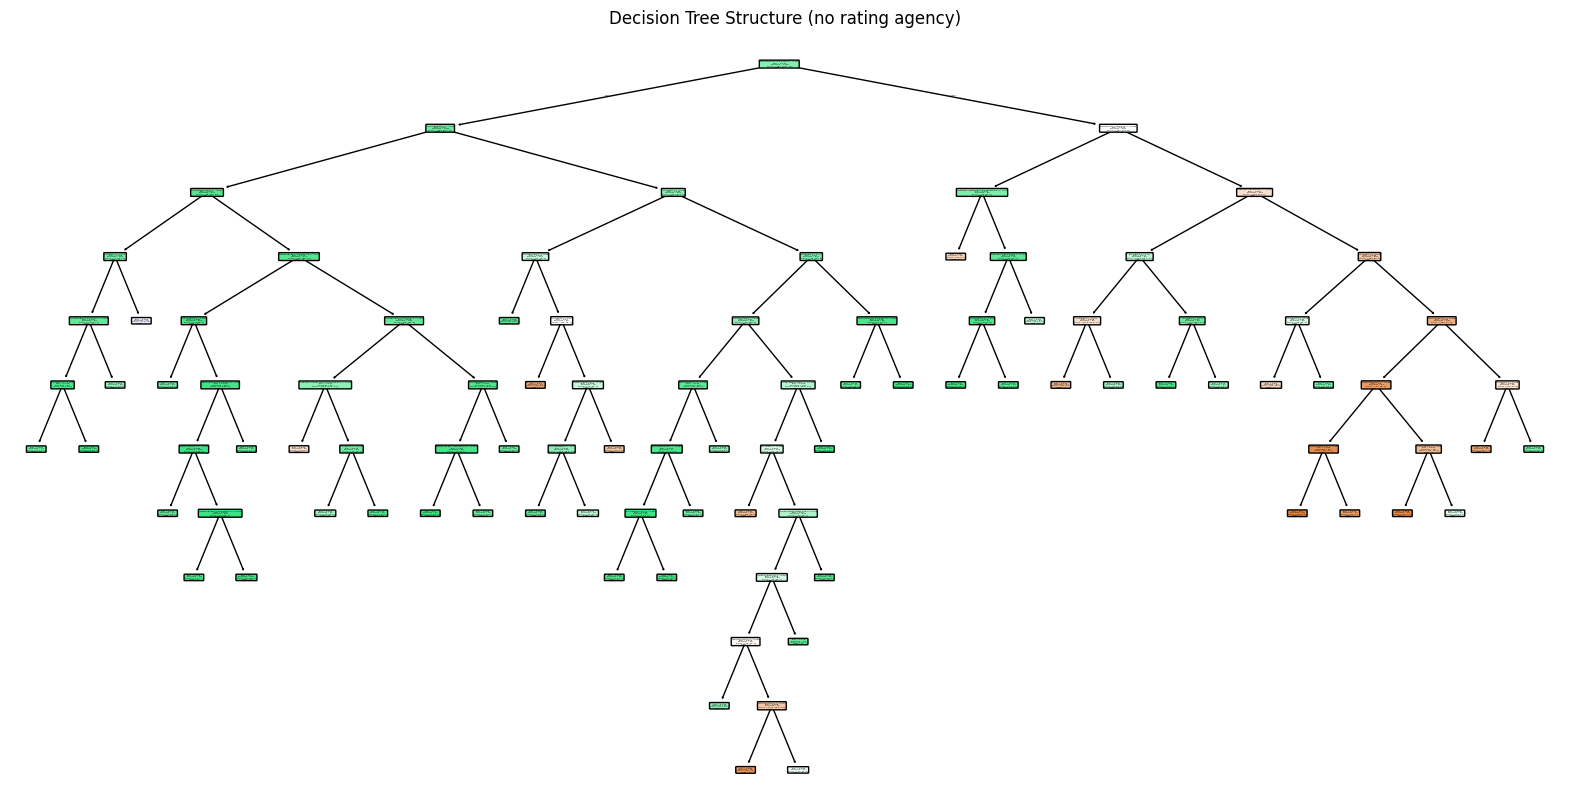

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score

data = pd.read_csv('/content/corporate_ratings.csv')
print("\nFirst few rows of data:")
print(data.head())


# 2) plot a histogram
plt.figure()
plt.hist(data['Rating'].dropna(), bins=20, edgecolor='black')
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.title("Histogram of Bond Ratings")
plt.show()

# 3) collapse rating gradations
def collapse_rating(r):
    if r in ['AAA', 'AA', 'A']:
        return 'A'
    elif r in ['BBB', 'BB', 'B']:
        return 'B'
    else:
        return 'C'

data['Rating_Collapsed'] = data['Rating'].apply(collapse_rating)

plt.figure()
plt.hist(data['Rating_Collapsed'], bins=3, edgecolor='black')
plt.xlabel("Collapsed Rating")
plt.ylabel("Frequency")
plt.title("Histogram of Collapsed Bond Ratings")
plt.show()

# 4) Prepare the feature matrix and target vector
cols_to_drop = ['Rating', 'Date', 'Name', 'Symbol', 'Rating Agency Name']
X = data.drop(columns=cols_to_drop + ['Rating_Collapsed'])
y = data['Rating_Collapsed']
X = pd.get_dummies(X, columns=['Sector'], drop_first=True)

print("\nFeature matrix:")
print(X.head())


# 5) Train-test split and Decision Tree Classification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
accuracy_scores = {}

for leaf in range(1, 26):
    clf = DecisionTreeClassifier(min_samples_leaf=leaf, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracy_scores[leaf] = acc

# find the best min_samples_leaf
best_leaf = max(accuracy_scores, key=accuracy_scores.get)
print("\nOptimal min_samples_leaf (without Rating Agency):", best_leaf,
      "with test accuracy =", accuracy_scores[best_leaf])

plt.figure()
plt.plot(list(accuracy_scores.keys()), list(accuracy_scores.values()), marker='o')
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. min_samples_leaf")
plt.show()

# fit optimal decision tree
optimal_clf = DecisionTreeClassifier(min_samples_leaf=best_leaf, random_state=42)
optimal_clf.fit(X_train, y_train)
y_pred_opt = optimal_clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred_opt)
acc_opt = accuracy_score(y_test, y_pred_opt)
print("\nConfusion Matrix (no rating agency):")
print(cm)
print("\nOverall Accuracy (no rating agency):", acc_opt)

plt.figure(figsize=(20,10))
plot_tree(optimal_clf, feature_names=X_train.columns, class_names=optimal_clf.classes_, filled=True, rounded=True)
plt.title("Decision Tree Structure (no rating agency)")
plt.show()

5. When interpretating a comparison of the accuracy and confusion matrices by now adding rating agency information as a predictor shows wheter this methid improves prediction or wheter the original method was suitable. If there was an increase in accuracy with the rating agency then that highlights the agency contributes additional information about the ratings.

**Q5.** This is a case study about detecting fraud using classification trees. The goal is to predict the `class` variable, which is 0 for non-fraud and 1 for fraud.

1. Open `./data/creditcard_fraud.csv`. Print the number of observations and variables, and look at the first few rows of data. The variables are already normalized and de-identified, and are just called things like `V8` to protect the privacy of the clients.

2. Print a table of counts for the `class` variable and make a histogram. What percentage of transactions are fraudulent?

3. Drop `Time` and make a decision tree classifier to predict fraud. Print a confusion table and compute the accuracy. This is a serious **class imbalance** problem: The minority class is so small that essentially predicting 0's for all cases will achieve an extremely high accuracy. There are over-sampling techniques to deal with this issue, but we don't have time to cover them in class.

4. Imagine that you block every transaction in the test set labelled as fraudulent. How much money is (1) saved that should be saved, (2) lost to fraud anyway, (3) withheld in error from customers? Does implementing this anti-fraud system seem like a good idea, or not? Why?

5. Instead of predicting fraud, predict loss: Multiple the `Class` variable times the `Amount` variable, and call it `Loss`. Predict it using a decision tree regressor (making sure to drop Class, Time, and Loss from the features/covariates/predictors). What $R^2$ and RMSE do you get? Make a scatterplot of the predicted values on the test group versus the actual test values. Do you notice any interesting patterns? How could you use this algorithm to decide which transactions to block, and why?


**Q6.** Show that any decision tree is equivalent to a linear regression on a set of dummy variables that represent the optimal splits in the tree.

Hint: You can think of CART as partitioning the feature space into a set of sets $\{S_1, S_2, ..., S_K\}$, and then predicting the average for all of the observations in each set $S_k$, $m_k$:
$$
\hat{y}(x) = \sum_{k=1}^K \mathbb{I}\{ x \text{ is in } S_k \} m_k
$$
where $\mathbb{I} \{ P(x,k)\}$ takes the value 1 if the proposition $P(x,k)$ is true and 0 otherwise. Now, doesn't that look like least-squares regression on a set of dummy/one-hot-encoded variables?

Conversely, can any linear regression be represented by a tree?